9 11
17O


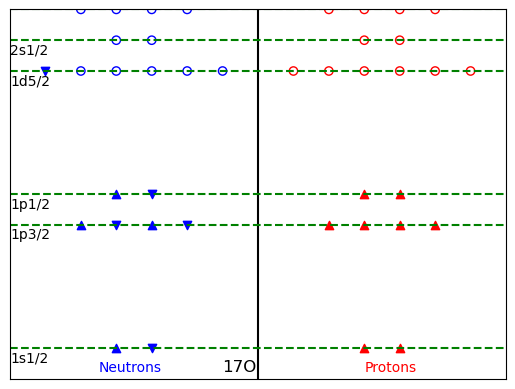

In [23]:
import matplotlib.pyplot as plt
import numpy as np
###
nuclei = {1: "H", 2: "He", 3: "Li", 4: "Be", 5: "B", 6: "C", 7: "N", 8: "O", 9: "F", 10: "Ne", 
          11: "Na", 12: "Mg", 13: "Al", 14: "Si", 15: "P", 16: "S", 17: "Cl", 18: "Ar", 
          19: "K", 20: "Ca", 21: "Sc", 22: "Ti", 23: "V", 24: "Cr", 25: "Mn", 26: "Fe", 
          27: "Co", 28: "Ni"}
levels = ["1s1/2","1p3/2","1p1/2","1d5/2","2s1/2","1d3/2"]
###

deg = np.array([2,4,2,6,2,4])
ene = np.array([0,4,5,9,10,11])
#
n_occ = np.array([2,4,2,1,0,0])#Fill in with the occupation of these shells for neutrons
p_occ = np.array([2,4,2,0,0,0])#Fill in with the occupation of these shells for protons
mass = np.sum(n_occ)+np.sum(p_occ)
Z = np.sum(p_occ)
maxshell_pind  = np.where(p_occ != 0)[0][-1]
maxshell_nind  = np.where(n_occ != 0)[0][-1]
n_draw = []
p_draw = []

n_offset = -3
p_offset = +4

for shell, nshell in enumerate(deg):
    for n in range(nshell):
        if(n_occ[shell]!=0):
            if(n_occ[shell]%2 == 0):
                plt.scatter(n_offset-0.5*nshell+(n),ene[shell],color='blue',marker='^')
            else:
                plt.scatter(n_offset-0.5*nshell+(n),ene[shell],color='blue',marker='v')
            n_occ[shell] -= 1
        else:
            plt.scatter(n_offset-0.5*nshell+(n),ene[shell],facecolors='none', edgecolors='blue')            
for shell, pshell in enumerate(deg):
    for p in range(pshell):
        if(p_occ[shell]!=0):
            if(n_occ[shell]%2 == 0):
                plt.scatter(p_offset-0.5*pshell+(p),ene[shell],color='red',marker='^')
            else:
                plt.scatter(p_offset-0.5*pshell+(p),ene[shell],color='red',marker='v')
            p_occ[shell] -= 1
        else:
            plt.scatter(p_offset-0.5*pshell+(p),ene[shell],facecolors='none', edgecolors='red')

###########
maxshell = ene[np.max([maxshell_pind,maxshell_nind])]

ymax = maxshell+2
print(maxshell,ymax)
xmax = 7
plt.vlines(0,-1,ymax,color='black')
for ne, e in enumerate(ene):
    plt.hlines(e,-xmax,xmax,color='green',linestyle='dashed')
    if(e<ymax):
        plt.text(-xmax,e-0.45,levels[ne],color='black')
plt.xlim(-xmax,xmax)
plt.ylim(-1,ymax)
plt.xticks([])
plt.yticks([])
plt.text(-0.5*xmax-1, -0.75, 'Neutrons',color='blue')
plt.text(.5*xmax-0.5, -0.75, 'Protons',color='red')
name = str(mass)+nuclei[Z]
namesave = name+".png"
print(name)
plt.text(-1,-0.75,name,fontsize=12)
plt.savefig(namesave)
plt.show()